# GUC NETW 1003 Kmeans Assginmnet 

Objective: exercise is to learn how to use build and use  kmeans clustering algortrithm    

At the end of this lab you will be able to
> 1. Build and run a K-means algorithm.
> 2. Know how to evalute K-means Algorithm 
> 2. Understand the effect of the parmeters ont he perfromance of the algorithm .
> 3. Understand the effect of distance.

## 1. Wirte K means function 

import required libraries 

In [2]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

> ### 1.1. Code for the distance function 

write a function to calculate the distance between a set of cluster centroids and all the data points 

Cluster_Distances = GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type) 
* The function shoud be able to handel data points with any number of features and any number of points 
* The function should be able to handle any K number of cluster centroids 
* To inrease speed do that in matrix format using numpy
* This should produce a matrix with rows equal to data points columns equal K 
* You should be able to calculate different types of Distance. In this assginmnet you are required to implement the following two 
    - Ecluidian distance
    - Pearson correlation distance
  

In [3]:
def GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type ):
    if(Distance_Type == 'euclidean'):
        Cluster_Distance = np.sqrt(((Cluster_Centroids-Data_points[:,np.newaxis,:])**2).sum(axis=2)) #broadcast is applied as mxn and the other is kxn so the dont have same dims
        
    elif(Distance_Type == 'pearson'):
          samples_mean = np.mean(Data_points)
          clusters_mean = np.mean(Cluster_Centroids)
          devX = Data_points - samples_mean
          devY = Cluster_Centroids - clusters_mean
          num = np.dot(devX,devY.T)
          den = np.sqrt(np.sum(devX**2)*np.sum(devY**2))
          Cluster_Distance = 1-(num/den)
    else:
        Cluster_Distance = 0      
          
    return Cluster_Distance 

# # 
# testing cases 
# # define sample data

# Cluster_Centroids = np.array([[7.43006753, 7.10781087],
#                               [6.31648446, 8.93027238],
#                               [7.92420835, 6.36457321]])
# # Cluster_Centroids = np.array([[1, 2], [3, 4]])
# Data_points = np.array([[5, 6], [7, 8], [9, 10]])

# # define distance type
# Distance_Type = 'eculidean'

# # call GUC_Distance function
# Cluster_Distance = GUC_Distance(Cluster_Centroids, Data_points, Distance_Type)

# # expected output
# expected_output = np.array([[5.65685425, 8.48528137, 11.3137085],
#                             [2.82842712, 2.82842712, 2.82842712]])

# # compare actual output with expected output

# print(expected_output)
# print(Cluster_Distance)
# print(type(Cluster_Distance))
# print(Cluster_Distance[2][1])



> ### 1.2. Code for K means function 

> Loop until a stopping condition 

> > in the loop do the following 
> > 1. Cluster Assginmnet 
> > > * Use the GUC_Distance to calculate between each cluster head and all the points 
> > > * Find the value and index of the minimum distance  for each row. 
> > > * for each point in the row use the index of the minmum distance to represent the cluster Centroid that this point will belong to.
> > > * Calculate and record the mean square distance for each cluster  
> > > * Use the mean square distances to calculate a stopping condition (e.g the sum of mean distances)
> > 2. Updtate Centroids  
> > > * Update the value for the cluster heads by calculating the mean value for the points in each cluster 
> > >  * Calculate the Cluster Metric (Distortion Function)
> > > > a number indicating the how good the clusters are . An example cluster metric is the  (sum of squared error between each point and its cluster center) 

In [10]:
def mean_squared_error(X, centroids):
    # Calculate squared Euclidean distance between each data point and each centroid
    distances = np.sum((X[:, np.newaxis, :] - centroids) ** 2, axis=2)
    
    # Find the index of the nearest centroid for each data point
    nearest_centroids = np.argmin(distances, axis=1)
    
    # Calculate the mean squared error for each cluster
    mse_per_cluster = np.array([np.mean(distances[nearest_centroids == j])
                                for j in range(len(centroids))])
    
    # Calculate the overall mean squared error
    mse = np.mean(mse_per_cluster)
    
    return mse

def GUC_Kmean(Data_points, Number_of_Clusters,  Distance_Type):
    # code for initial cluster heads
    minVal = np.amin(Data_points, axis=0)
    #print(f'minVal: {minVal}')
    maxVal = np.amax(Data_points, axis=0)
    #print(f'maxVal: {maxVal}')
    # clusterCentroids = np.random.uniform(minVal, maxVal,size=(Number_of_Clusters,Data_points.shape[1]))
    centroid_indices = np.random.choice(Data_points.shape[0], size=Number_of_Clusters, replace=False)
    print(centroid_indices)
    clusterCentroids = Data_points[centroid_indices]

    #print(f'Intial Cluster Heads:\n {clusterCentroids}')
    
    epsilon = 0.0000000001
    #here the loop starts
    iterations = 0
    stop_cond_reached = False
    old_sum = 0
    while not stop_cond_reached:
    
        #finding the distance
        cluster_distance_matrix = GUC_Distance(clusterCentroids,Data_points,Distance_Type)
       # print(f'GUC_Distance from all points to all cluster heads:\n {cluster_distance_matrix}') 
        # saving the index for the cluster where each point is close to 
        # this will returne an array where each element corresponds to 
        # the index of the min value in each row 
         
        min_distances_for_each_row = np.argmin(cluster_distance_matrix,axis=1)
     #   print(np.unique(min_distances_for_each_row))
       # print(f'mid distances indices:\n {min_distances_for_each_row}')
        sum_mean_square_distance = 0
    
        #mean square distance part
        mean_square_distance=np.zeros(Number_of_Clusters)
        for i in range(Number_of_Clusters):
           # print(f'values of the distances of points attached to {i+1}th cluster:\n {cluster_distance_matrix[min_distances_for_each_row == i,i]}')
            if(not (cluster_distance_matrix[min_distances_for_each_row==i,i].size == 0)):
                mean_square_distance[i] = np.mean(cluster_distance_matrix[min_distances_for_each_row==i,i]**2)
            else:
                mean_square_distance[i] = 0   
              
                 
          #  print(f'the mean squared distance for {i+1}th cluster is equal {mean_square_distance[i]}')
        
        sum_mean_square_distance = np.sum(mean_square_distance)
        new_sum = sum_mean_square_distance
        
        # print(f'Sum Mean Square Distance is equal to {sum_mean_square_distance}')
        
        if ( (abs(new_sum - old_sum)) < epsilon )or ( iterations == 500):
            stop_cond_reached = True
      #      print(f"difference of the old sum and new sum{abs(new_sum - old_sum)}")
       #     print(iterations)
        #    print("loop ended")
            continue
            
        else:
         #   print(f"difference of the old sum and new sum{abs(new_sum - old_sum)}")
            
            old_sum = new_sum
        
        for i in range(Number_of_Clusters):
            
            if(not (Data_points[min_distances_for_each_row == i,:].size == 0)):
             #   print(f'data points assigned to {i+1}th cluster {Data_points[min_distances_for_each_row == i,:]}')
                clusterCentroids[i,:] = np.mean(Data_points[min_distances_for_each_row == i,:],axis=0)
            else:
                clusterCentroids[i,:] = clusterCentroids[i,:]
            
            #print(f'{i+1}th new cluster centroid:\n {clusterCentroids[i,:]}')
        
        distortion = 0
        for i in range(Number_of_Clusters):
            clusterPoints = Data_points[min_distances_for_each_row==i]
            if clusterPoints.shape[0] > 0:
                distances = np.sum(np.square(clusterPoints - clusterCentroids[i,:]))
                distortion += np.sum(distances)
            # print(f'Distortion for {i}th cluster : {distortion}')
        iterations +=1
        
    return [cluster_distance_matrix,distortion,clusterCentroids,min_distances_for_each_row]



## 2. Display Results 

* below is a an example fuction that displayes Clusters in 2D 

* You need to change the function so that is can display an n dimension data in the form of pairs of subplot 2D figures 

* The function is a helper function that is originaly be found in 
https://www.coursera.org/learn/ibm-unsupervised-learning/


In [42]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

> #### 2.1. helper Display function 

In [5]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,labels=[],cluster_centers=[],num_clusters=0):
    color1 = 'Set1'  #List colors
    
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        sns.pairplot(pd.DataFrame(X))
    else:
        for i in range(num_clusters):
            plt.scatter(X[labels==i,0],X[labels==i,1],cmap = color1,alpha = alpha,s=s)
            plt.scatter(cluster_centers[i][0],cluster_centers[i][1],cmap = color1, marker = 'x', s = 200)
            
            

> #### 2.2. Example 1 : Circular Data Gen and display 

* below is an example of how to use the funciton 
  *  prepare the figure size and background 
   > * this part can be replaced by a number of subplots 
  
  * Produce a data set that represent the x and y o coordinates of a circle 
   > * this part can be replaced by data that you import froma file 
  
  * Data is displayed 
   > * to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 

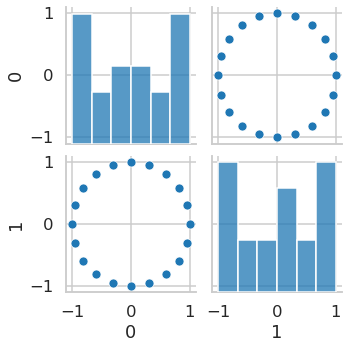

distance used euclidean
distortion 11.94677612342194


distortion 6.273506145571169


distortion 3.840233865689515


distortion 2.6829739312701326


distortion 1.8456202628594305


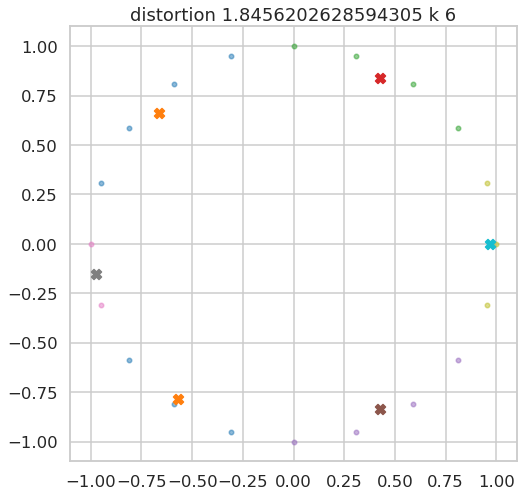

distortion 1.5676946398465086


distortion 1.195076002220116


distortion 1.0118433938206643


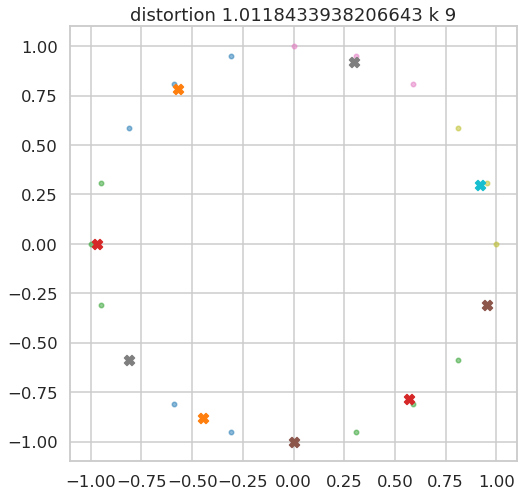

distortion 1.0971890348104232


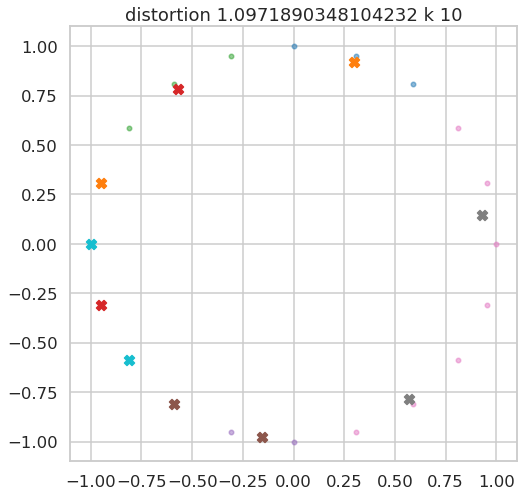

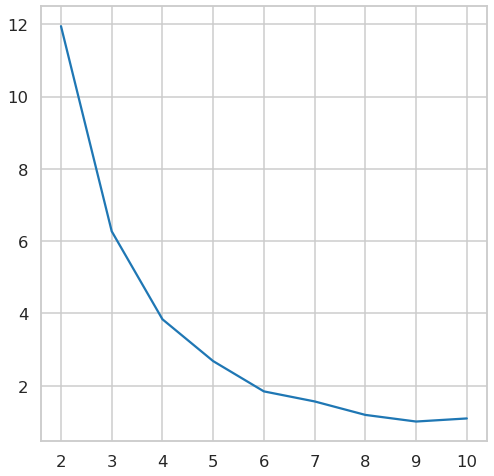

distance used pearson
distortion 11.827308362187718


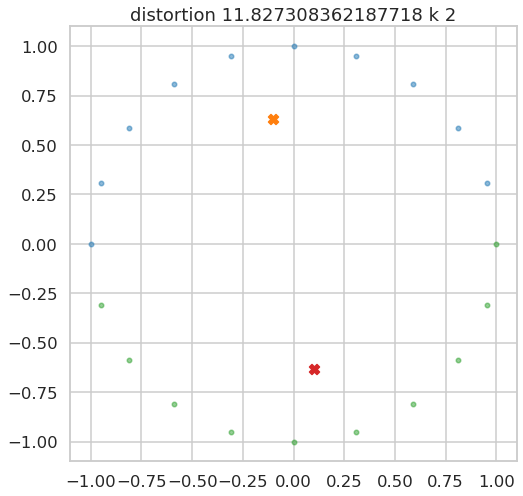

distortion 6.273506145571169


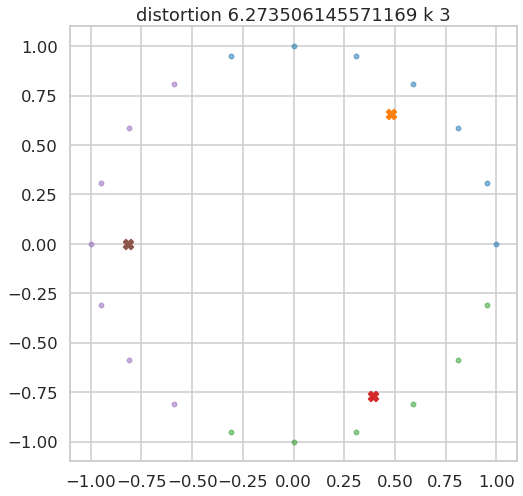

distortion 3.6546167243754395


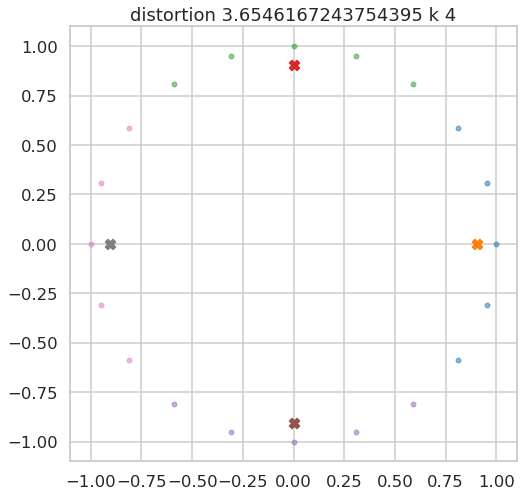

distortion 2.5177509782252803


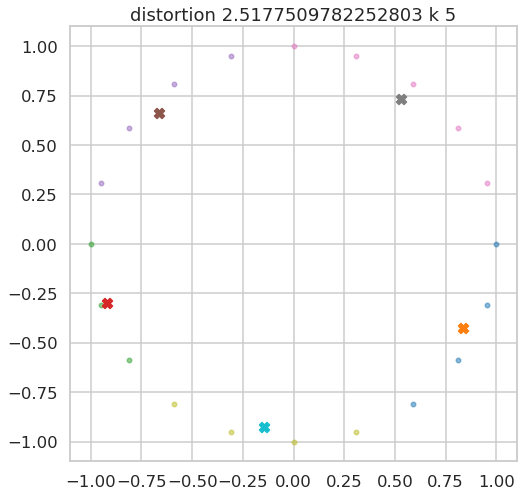

distortion 1.7113311381648257


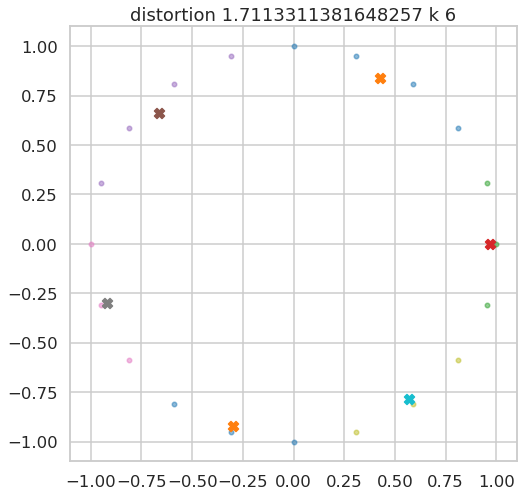

distortion 1.204423375843828


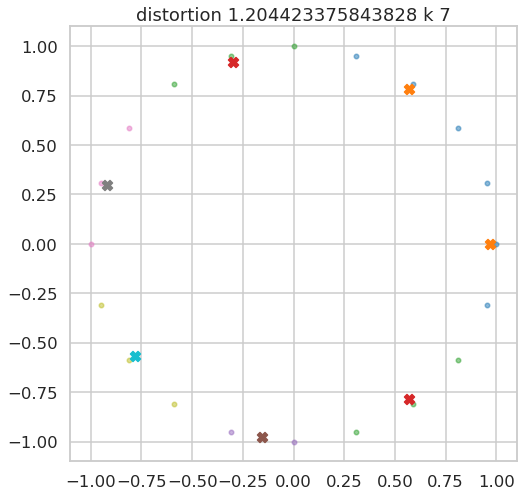

distortion 1.1950760022201155


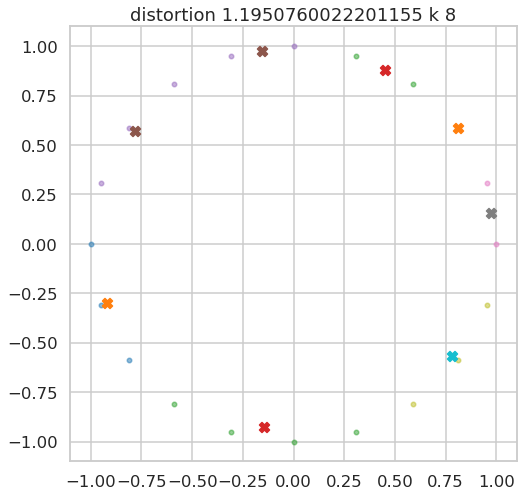

distortion 1.1461325185152695


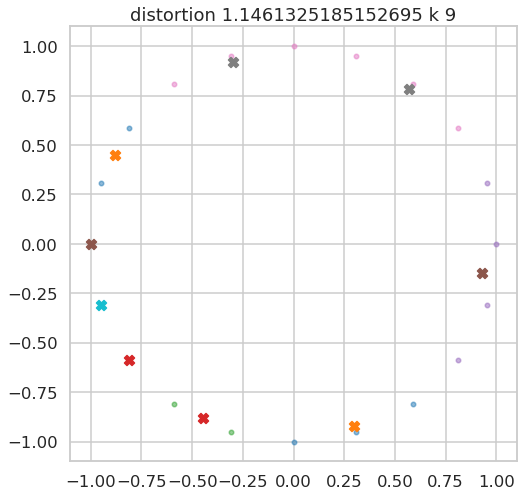

distortion 0.7735138808888766


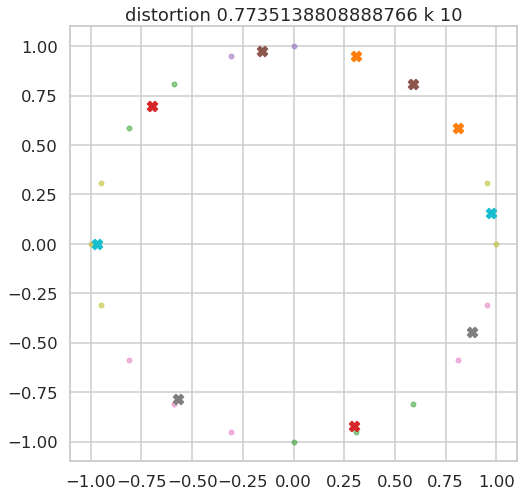

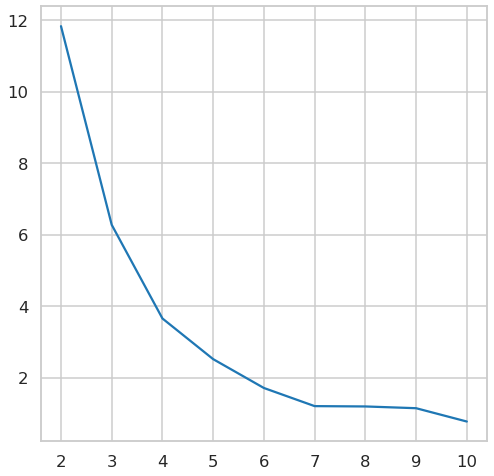

In [78]:
# prepare the figure sise and background 
# this part can be replaced by a number of subplots 
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
# Data is displayed 
# to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 
test_Kmeans(X)




> #### 2.3. Example 2 : Multi blob Data Gen and display 

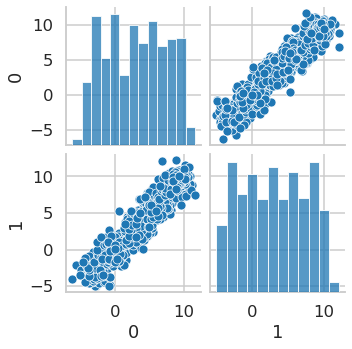

distance used euclidean
distortion 10354.018824821154


distortion 4940.787066626593


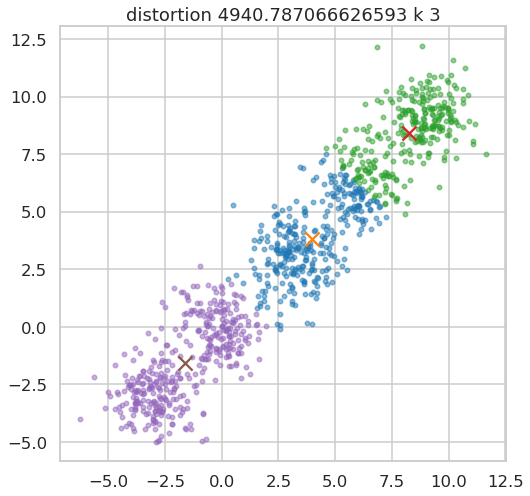

distortion 3181.0879311762355


distortion 1868.9147767478087


distortion 1724.5557707986102


distortion 1595.093931592055


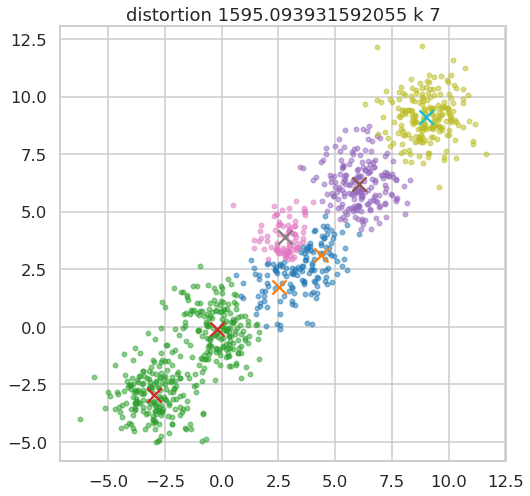

distortion 1452.512898381291


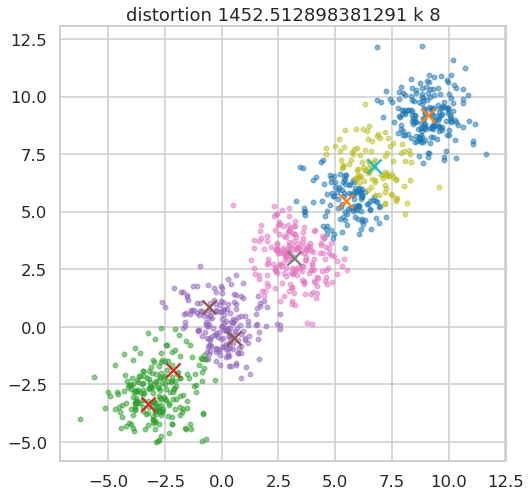

distortion 1340.193598738275


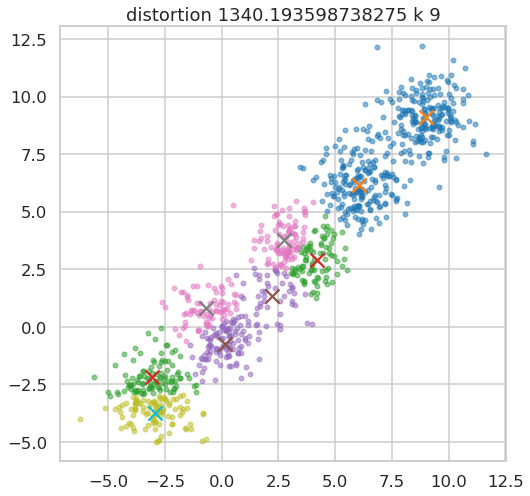

distortion 1200.0060672818186


distance used pearson
distortion 10457.832007622164


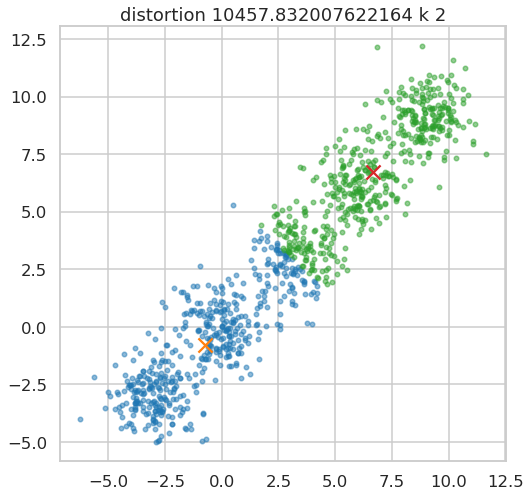

distortion 10136.831456489454


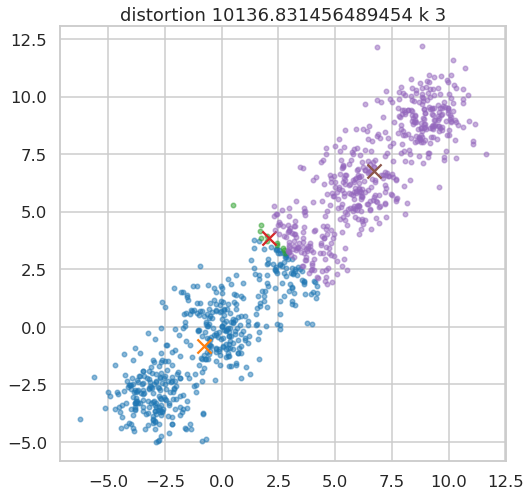

distortion 10136.831456489454


distortion 9623.32468028835


distortion 9623.32468028835


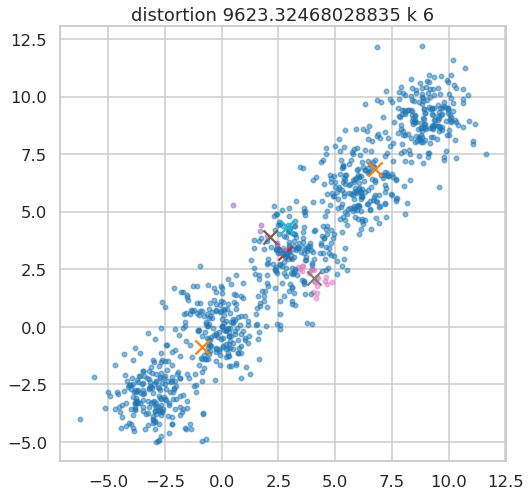

distortion 9623.32468028835


distortion 9623.32468028835


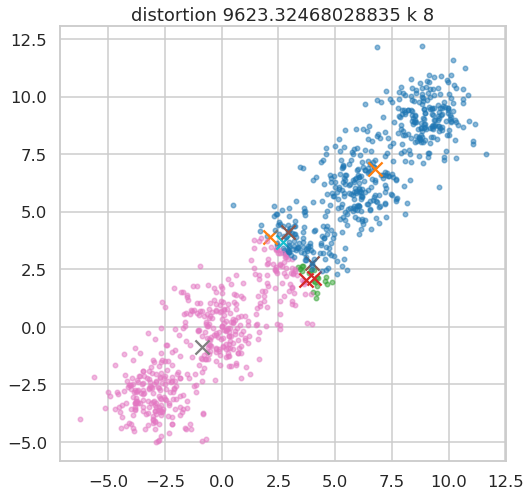

distortion 9623.32468028835


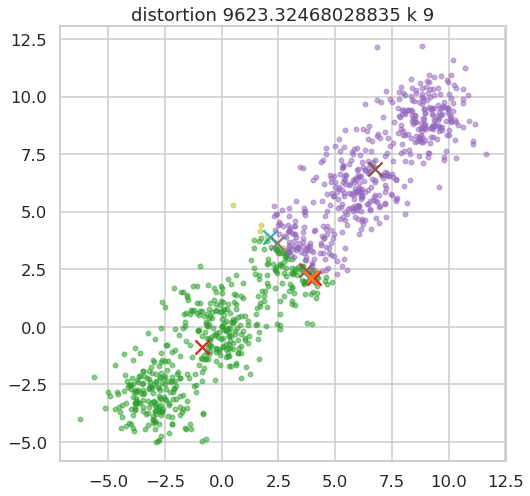

distortion 9623.32468028835


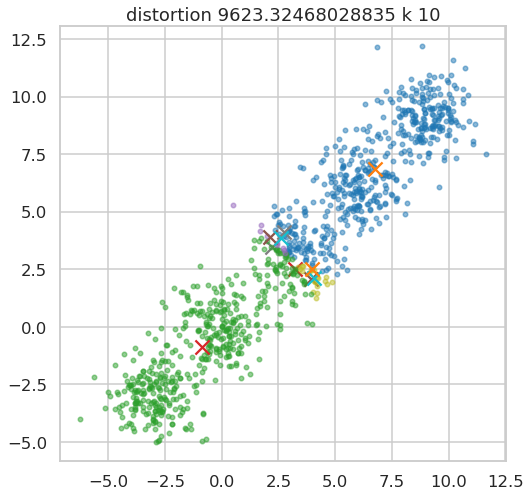

In [81]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
test_Kmeans(X)

#### 2.3. Example 3 : moons Data Gen and display 

distance used euclidean
distortion 414.50739973636405


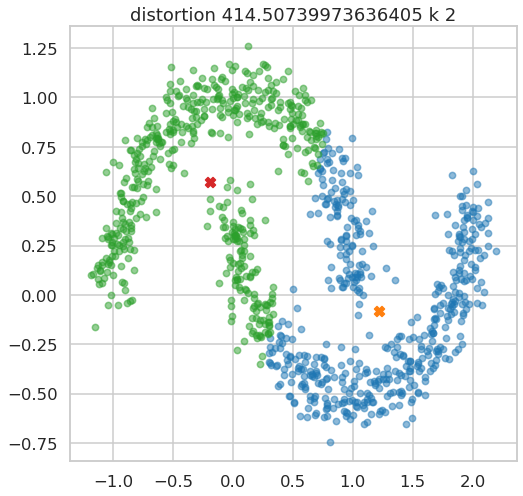

distortion 281.68953103214056


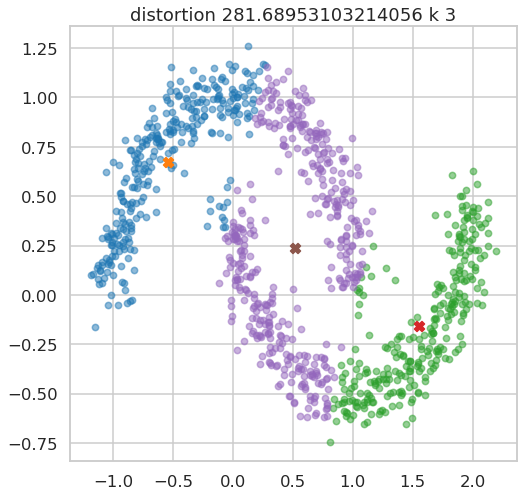

distortion 183.955705295708


distortion 139.08878264525717


distortion 122.57291233532544


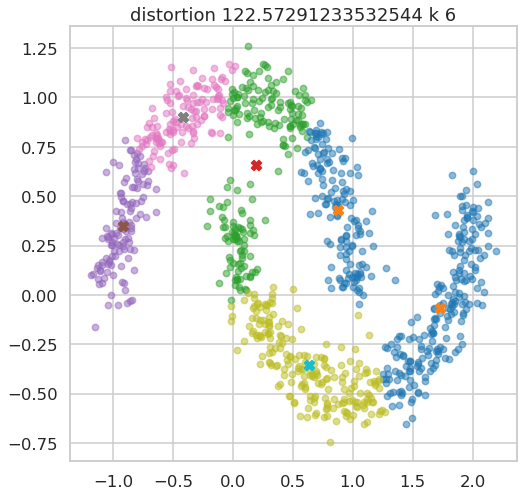

distortion 81.42291643513984


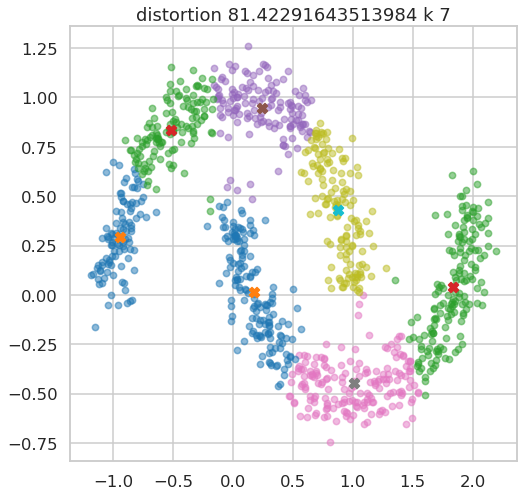

distortion 61.902118182128326


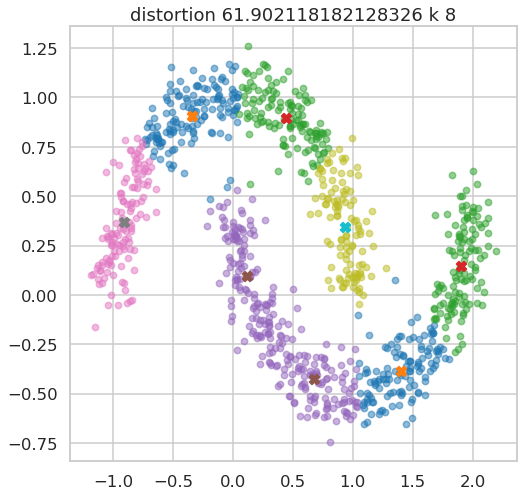

distortion 51.48276775353759


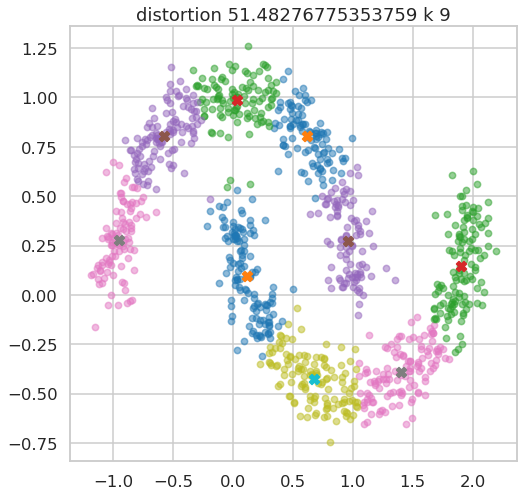

distortion 46.96111203659799


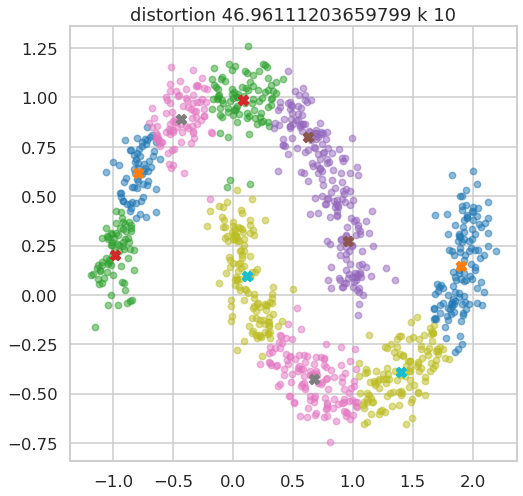

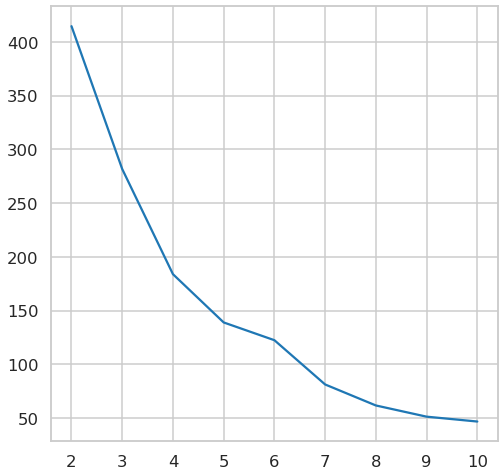

distance used pearson
distortion 420.0844592417428


distortion 356.07029797590576


distortion 318.3906850444717


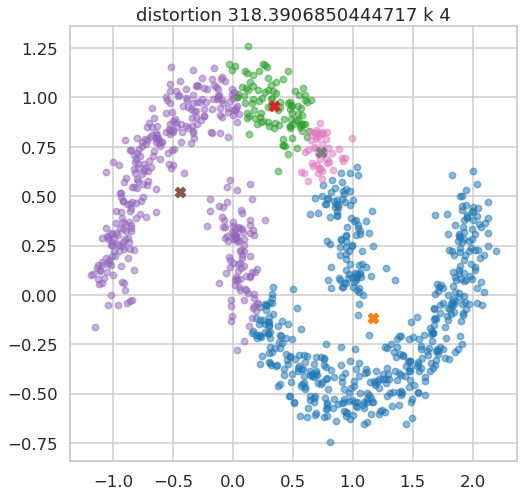

distortion 280.53056573986134


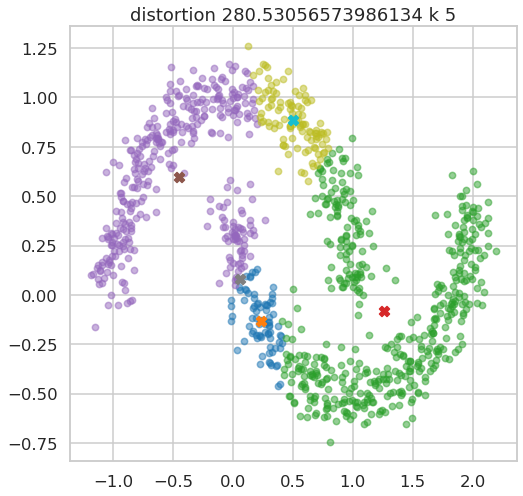

distortion 266.81408445880396


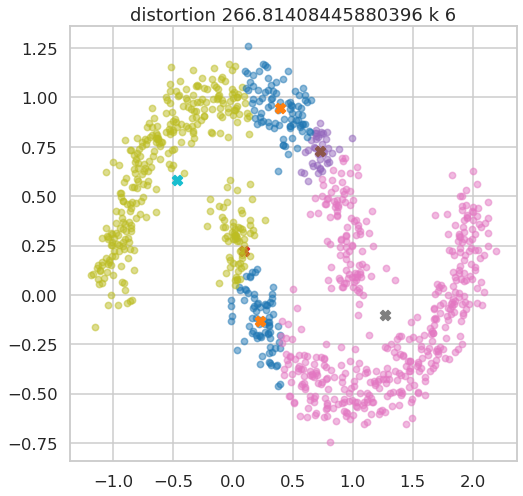

distortion 268.27853343411806


distortion 266.63112825114956


distortion 266.81408445880396


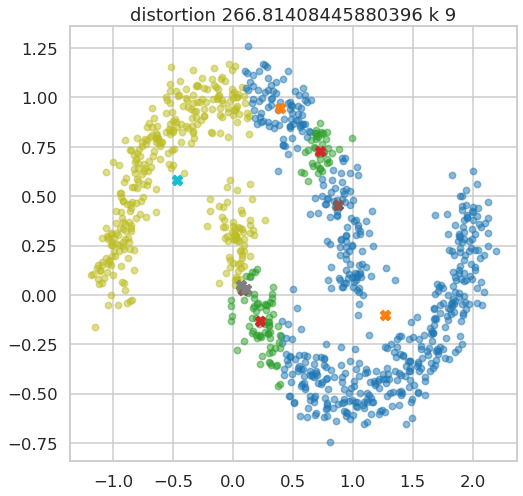

distortion 266.68372241483655


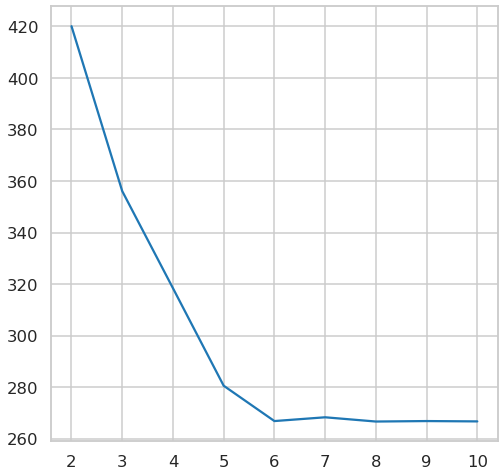

In [74]:
n_samples = 1000
X, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
test_Kmeans(X)

## 3. Testing the GUC_Kmean function on Simple 2D
1. Apply the GUC_Kmean fucntion to 2D Data provided by example 1, Example 2 and Example 3
2. Try a varing number of cluster centriods that range from 2 to 10 clusters on each set 
3. Display your results.
4. plot the Cluster perfromance Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

In [29]:
def test_Kmeans(X,distances=[]):

    if(distances == []):
        distances_list = ['euclidean','pearson']
    else:
        distances_list = ['euclidean']
        
    num_of_clusters = list(range(2,11,1))
    
    display_cluster(X)
    plt.show()
    for distance in distances_list:
        print(f"distance used {distance}")
        distortions = []
        for clusters in num_of_clusters:
            cluster_distance_matrix,distortion,clusterCentroids,min_distances_for_each_row = GUC_Kmean(X,clusters,distance)
            display_cluster(X,min_distances_for_each_row,clusterCentroids,clusters)
            print(f'distortion {distortion}')
            plt.title(f'distortion {distortion} k {clusters}')
            plt.show()
            distortions.append(distortion)

        plt.title(f'distortion {distortion} k {clusters}')
        plt.xlabel("K")
        plt.ylabel("Distortion")
        plt.plot(num_of_clusters,distortions)  
        plt.show()

## 4. Using the GUC_Kmean function to segment customers int he provided customer dataset
1. Apply the GUC_Kmean fucntion to customer data  
2. Try a varing number of cluster that range from 2 to 10 cluster on each set 
3. Display your results.
4. plot the Cluster Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

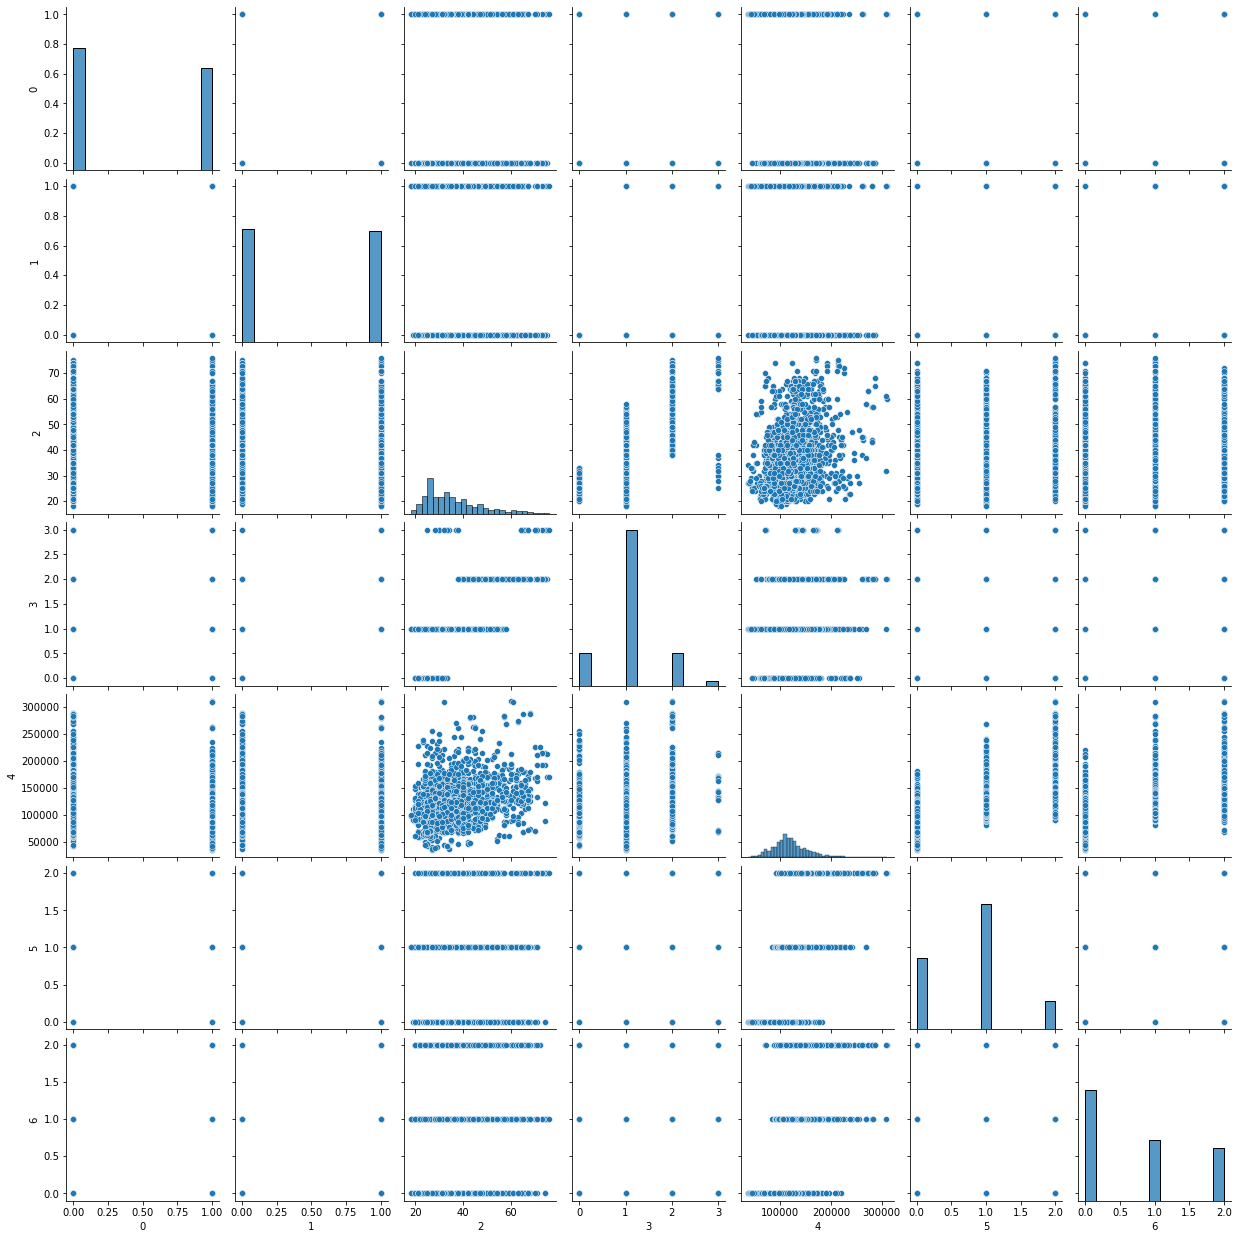

distance used euclidean
[987 938]
distortion 1214568338146


[757 829 468]
distortion 673037878342


[ 794 1009   84  131]
distortion 377736122665


[1907  799 1247 1731 1257]
distortion 248991425814


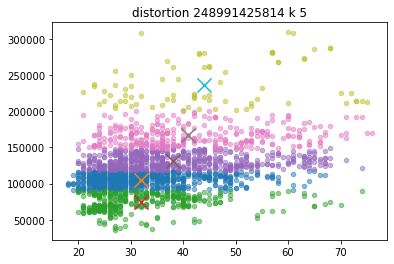

[1319  684 1486  392   24  669]
distortion 187440495504


[ 759 1070  375  401  828 1779 1367]
distortion 146889867055


[1839  585 1276 1367  664 1214 1833  983]
distortion 96374305096


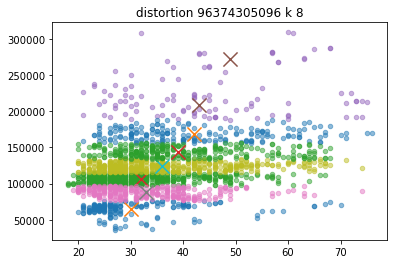

[1583  159 1107  286  731  489  479  208  640]
distortion 79660249996


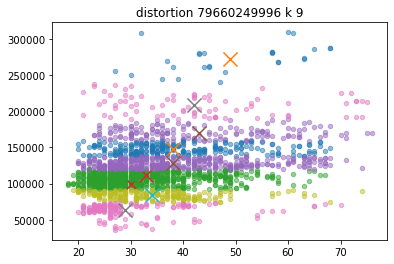

[1329 1933 1051 1966  170  824  981 1311 1249 1957]
distortion 68036870622


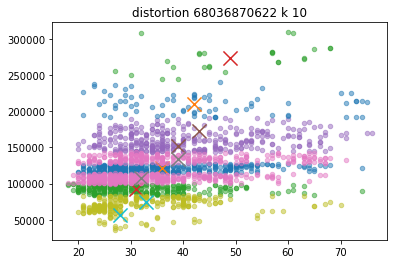

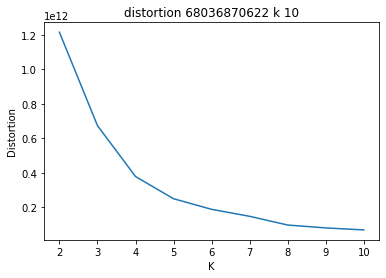

In [30]:
customer_df = pd.read_csv("/mnt/F432E65F32E625F8/my faculty/10th semester/Machine Learning/Projects/customerData.csv")

customer_df = customer_df.drop("ID",axis=1)

# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,labels=[],cluster_centers=[],num_clusters=0):
    color1 = 'Set1'  #List colors
    
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        sns.pairplot(pd.DataFrame(X))
    else:
        for i in range(num_clusters):
            plt.scatter(X[labels==i,2],X[labels==i,4],cmap = color1,alpha = alpha,s=s)
            plt.scatter(cluster_centers[i][2],cluster_centers[i][4],cmap = color1, marker = 'x', s = 200)
            
            

test_Kmeans(np.array(customer_df),'euclidean')
